## Análise de cursos de uma faculdade

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados_alunos.csv')

In [2]:
df.head()

,nome,idade,genero,curso,semestre,nota_final,faltas
0,Fernanda,22,F,Engenharia,7,8.85,21
1,Eduardo,28,M,ADS,1,6.49,9
2,Igor,24,M,Arquitetura,3,5.85,8
3,Igor,29,F,Arquitetura,10,5.65,7
4,Bruno,28,M,Arquitetura,7,8.64,5


In [3]:
df.tail()

,nome,idade,genero,curso,semestre,nota_final,faltas
95,Helena,26,M,ADS,2,6.65,21
96,Carlos,20,F,Engenharia,8,9.33,24
97,Diana,27,M,Direito,1,9.31,17
98,Igor,27,F,Medicina,9,8.88,17
99,Carlos,22,F,Medicina,8,9.75,21


In [4]:
df.shape

(100, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nome        100 non-null    object 
 1   idade       100 non-null    int64  
 2   genero      100 non-null    object 
 3   curso       100 non-null    object 
 4   semestre    100 non-null    int64  
 5   nota_final  100 non-null    float64
 6   faltas      100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


In [6]:
df.describe()

,idade,semestre,nota_final,faltas
count,100.000000,100.000000,100.000000,100.000000
mean,26.130000,5.880000,7.546800,15.000000
std,4.871386,2.985757,1.547776,9.222283
min,18.000000,1.000000,5.000000,0.000000
25%,22.000000,3.000000,6.060000,7.000000
50%,26.000000,6.000000,7.980000,14.000000
75%,30.000000,8.000000,8.872500,24.000000
max,35.000000,10.000000,9.980000,30.000000


In [7]:
df.describe(include= 'object')

,nome,genero,curso
count,100,100,100
unique,10,2,5
top,Diana,F,ADS
freq,16,64,26


In [8]:
df['nome'].value_counts()

nome
Diana       16
Helena      16
Igor        14
Carlos      10
Juliana      9
Bruno        9
Eduardo      8
Ana          7
Gustavo      6
Fernanda     5
Name: count, dtype: int64

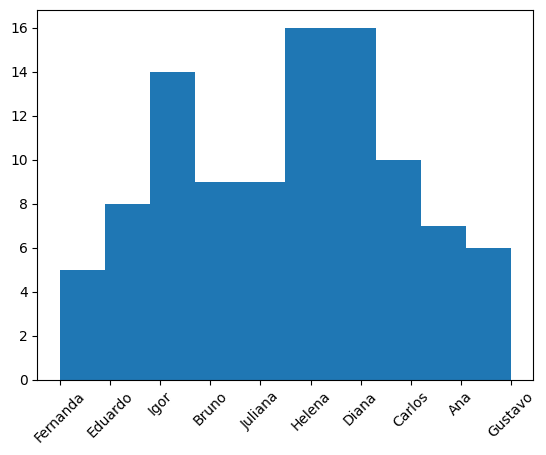

In [9]:
plt.hist(df['nome'])

plt.xticks(rotation=45)

plt.show()

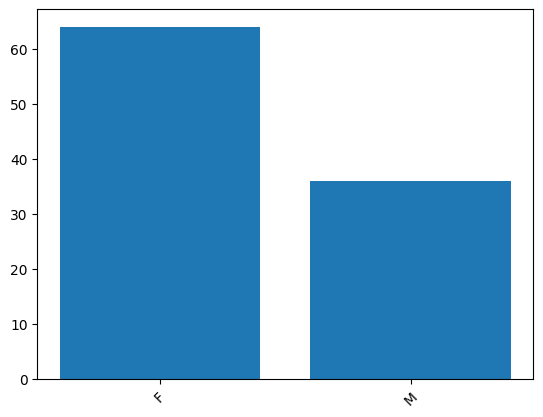

In [10]:
contagem_genero = df['genero'].value_counts()

plt.bar(contagem_genero.index, contagem_genero.values)

plt.xticks(rotation=45)
plt.show()


In [11]:
df['curso'].value_counts()

curso
ADS            26
Engenharia     22
Arquitetura    20
Direito        16
Medicina       16
Name: count, dtype: int64

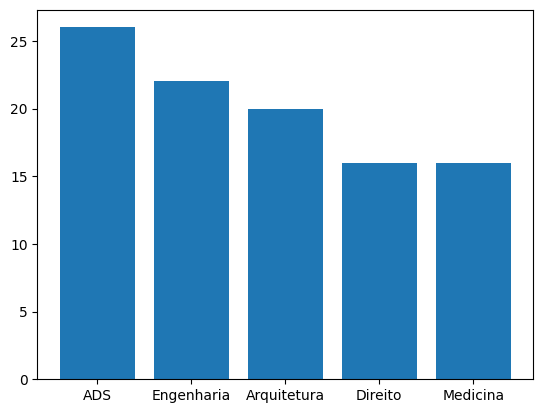

In [12]:
cursos_quantidades = df['curso'].value_counts()

plt.bar(cursos_quantidades.index, cursos_quantidades.values)

plt.show()

In [13]:
# o round arredonda o valor encontrado em (df['semestre'].mean()), o 1 é quantidade de casas decimais que eu quero nesse caso uma casa decimal
round(df['semestre'].mean(), 1)

np.float64(5.9)

In [14]:
# note média por curso 
# quantidade de alunos homens e mulheres de cada curso
# nota media dos homens e das mulheres 
# media de semestre por curso
# media de idade por curso
# media de idade por semestre

### Nota média por curso
---


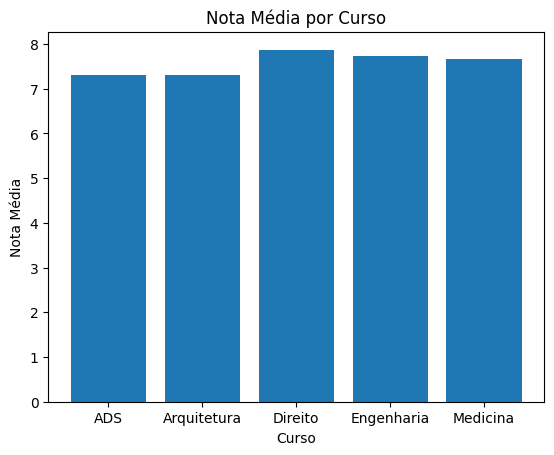

In [15]:
# Calcular a nota média por curso
nota_media_por_curso = df.groupby('curso')['nota_final'].mean()

# 4. Criar o gráfico de barras
plt.bar(nota_media_por_curso.index, nota_media_por_curso.values)

# 5. Adicionar título e rótulos aos eixos
plt.title('Nota Média por Curso')
plt.xlabel('Curso')
plt.ylabel('Nota Média')

# 6. Exibir o gráfico
plt.show()

### Quantidade de aluno, homens e mulheres, por curso


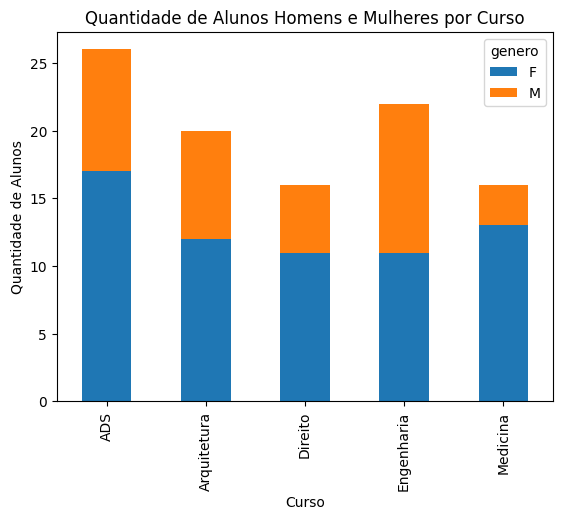

In [16]:
# 3. Agrupar os dados por 'curso' e 'genero' e contar a quantidade de alunos
contagem_por_genero = df.groupby(['curso', 'genero']).size().unstack(fill_value=0)

# 4. Criar o gráfico de barras empilhadas
contagem_por_genero.plot(kind='bar', stacked=True)

# 5. Adicionar título e rótulos aos eixos
plt.title('Quantidade de Alunos Homens e Mulheres por Curso')
plt.xlabel('Curso')
plt.ylabel('Quantidade de Alunos')

# 6. Exibir o gráfico
plt.show()

# Nota media dos homens e das mulheres
---

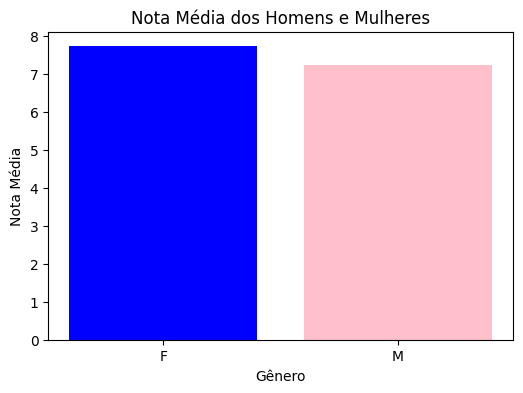

In [18]:
# --- GRÁFICO 1: Nota média dos homens e das mulheres em geral ---

# Agrupar por gênero e calcular a média das notas
nota_media_genero = df.groupby('genero')['nota_final'].mean()

# Criar o gráfico de barras para nota média por gênero
plt.figure(figsize=(6, 4))
plt.bar(nota_media_genero.index, nota_media_genero.values, color=['blue', 'pink'])

# Adicionar título e rótulos aos eixos
plt.title('Nota Média dos Homens e Mulheres')
plt.xlabel('Gênero')
plt.ylabel('Nota Média')

# Exibir o gráfico
plt.show()

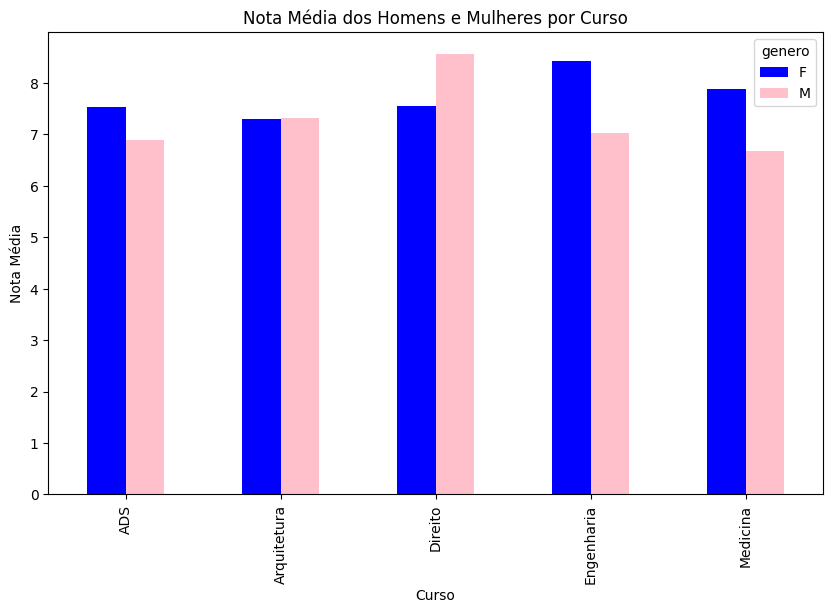

In [19]:

# --- GRÁFICO 2: Nota média dos homens e das mulheres por curso ---

# Agrupar por curso e gênero, e calcular a média das notas
nota_media_por_curso_genero = df.groupby(['curso', 'genero'])['nota_final'].mean().unstack()

# Criar o gráfico de barras para nota média por curso e gênero
nota_media_por_curso_genero.plot(kind='bar', figsize=(10, 6), color=['blue', 'pink'])

# Adicionar título e rótulos aos eixos
plt.title('Nota Média dos Homens e Mulheres por Curso')
plt.xlabel('Curso')
plt.ylabel('Nota Média')

# Exibir o gráfico
plt.show()

### Nota Média por semestre e por curso
---


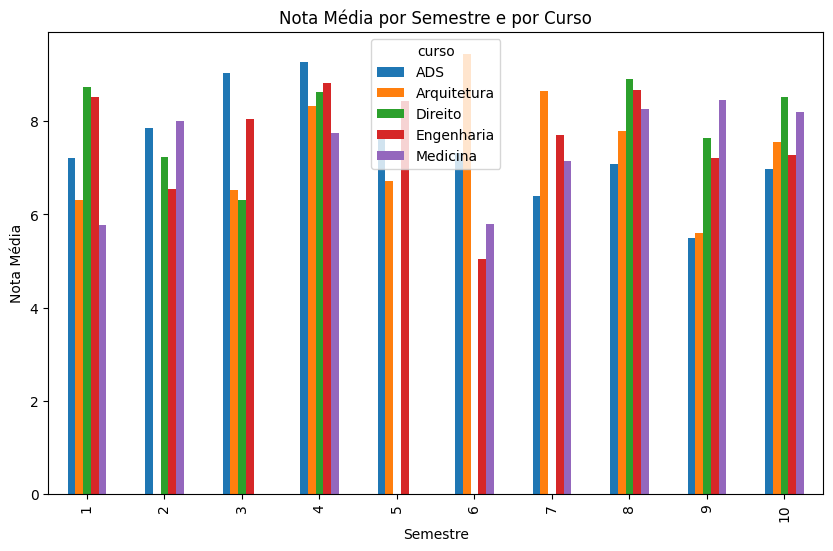

In [21]:
# --- CALCULAR A MÉDIA DAS NOTAS POR SEMESTRE E CURSO ---

# Agrupar por semestre e curso, e calcular a média das notas
nota_media_semestre_curso = df.groupby(['semestre', 'curso'])['nota_final'].mean().unstack()

# --- CRIAR O GRÁFICO DE BARRAS ---

# Criar o gráfico de barras para a média das notas por semestre e por curso
nota_media_semestre_curso.plot(kind='bar', figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Nota Média por Semestre e por Curso')
plt.xlabel('Semestre')
plt.ylabel('Nota Média')

# Exibir o gráfico
plt.show()

Média de semestres por curso: 8.8


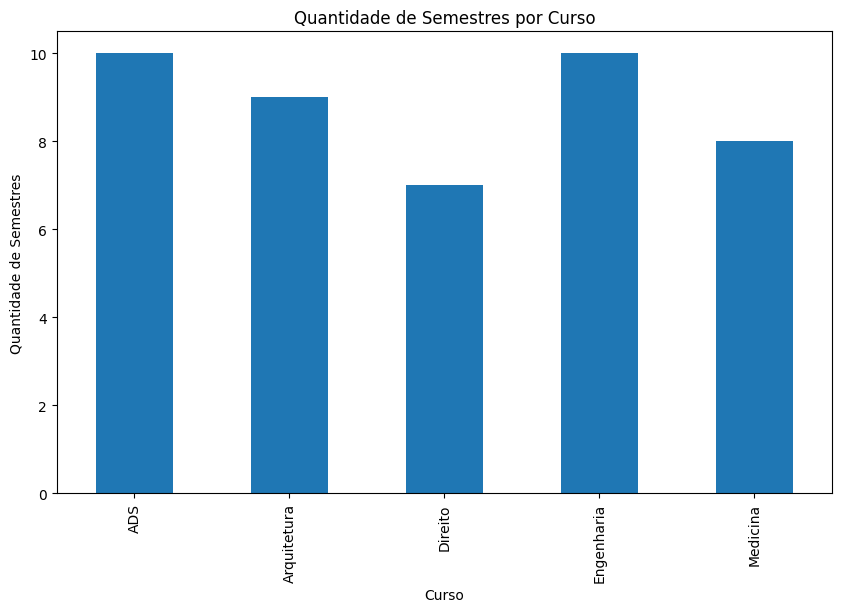

In [22]:
# Contar o número de semestres únicos por curso
quantidade_semestres_por_curso = df.groupby('curso')['semestre'].nunique()

# Calcular a média dessa quantidade de semestres por curso
media_semestres_por_curso = quantidade_semestres_por_curso.mean()

# Exibir o valor da média
print(f'Média de semestres por curso: {media_semestres_por_curso}')

# --- CRIAR O GRÁFICO ---

# Criar o gráfico de barras para a quantidade de semestres por curso
quantidade_semestres_por_curso.plot(kind='bar', figsize=(10, 6))

# Adicionar título e rótulos aos eixos
plt.title('Quantidade de Semestres por Curso')
plt.xlabel('Curso')
plt.ylabel('Quantidade de Semestres')

# Exibir o gráfico
plt.show()

curso
ADS            26.384615
Arquitetura    26.700000
Direito        24.062500
Engenharia     26.045455
Medicina       27.187500
Name: idade, dtype: float64


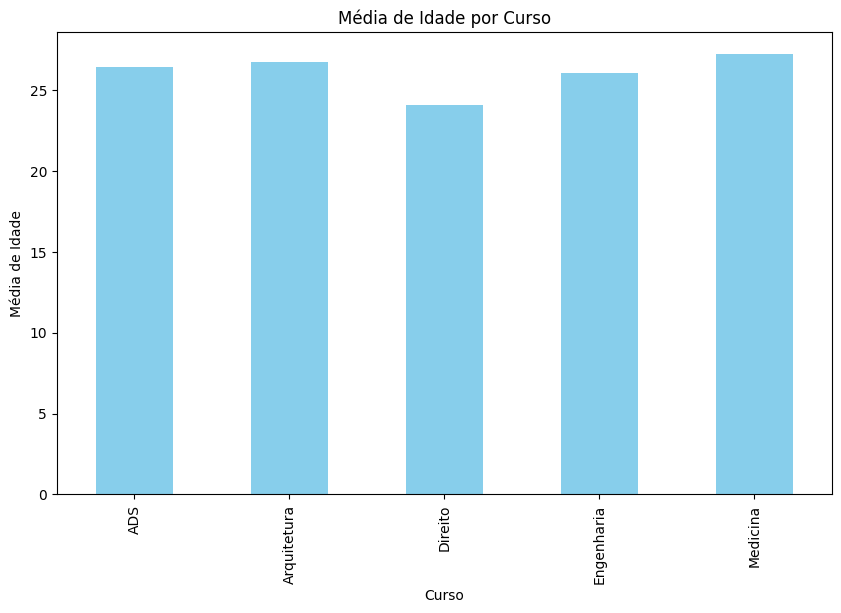

In [23]:
### media de idade por curso

# Agrupar os dados por curso e calcular a média das idades
media_idade_por_curso = df.groupby('curso')['idade'].mean()

# Exibir a média de idade por curso
print(media_idade_por_curso)

# --- CRIAR O GRÁFICO ---

# Criar o gráfico de barras para a média de idade por curso
media_idade_por_curso.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Média de Idade por Curso')
plt.xlabel('Curso')
plt.ylabel('Média de Idade')

# Exibir o gráfico
plt.show()

semestre
1     27.700000
2     26.666667
3     26.333333
4     25.125000
5     31.833333
6     26.777778
7     24.833333
8     24.923077
9     23.727273
10    26.384615
Name: idade, dtype: float64


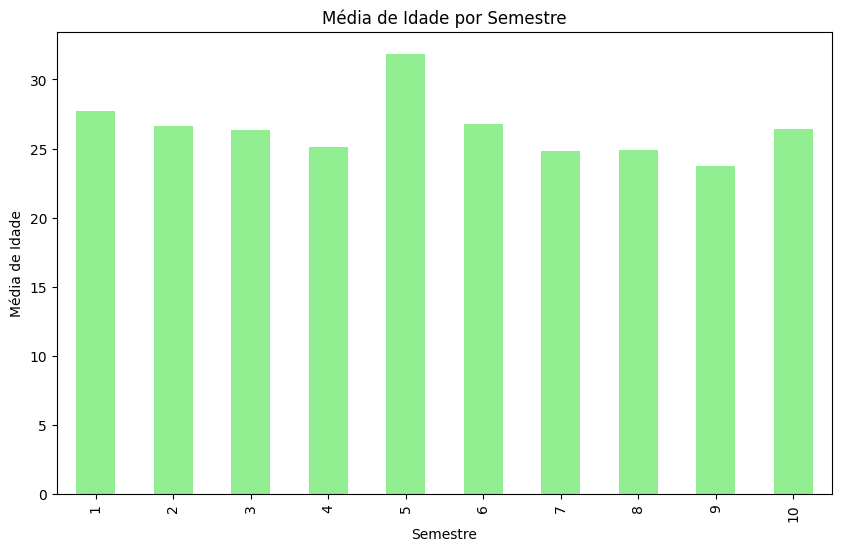

In [24]:

# Agrupar os dados por semestre e calcular a média das idades
media_idade_por_semestre = df.groupby('semestre')['idade'].mean()

# Exibir a média de idade por semestre
print(media_idade_por_semestre)

# --- CRIAR O GRÁFICO ---

# Criar o gráfico de barras para a média de idade por semestre
media_idade_por_semestre.plot(kind='bar', figsize=(10, 6), color='lightgreen')

# Adicionar título e rótulos aos eixos
plt.title('Média de Idade por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Média de Idade')

# Exibir o gráfico
plt.show()